In [1]:
library(dplyr)
library(caret)
library(neuralnet)
library(e1071)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'neuralnet'


The following object is masked from 'package:dplyr':

    compute




In [2]:
# this uses the MNIST data
df_train <- read.csv("C:/Users/kgtrm/Documents/R projects data/MNIST_train.csv")
df_test <- read.csv("C:/Users/kgtrm/Documents/R projects data/MNIST_test.csv")

head(df_train)
head(df_test)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


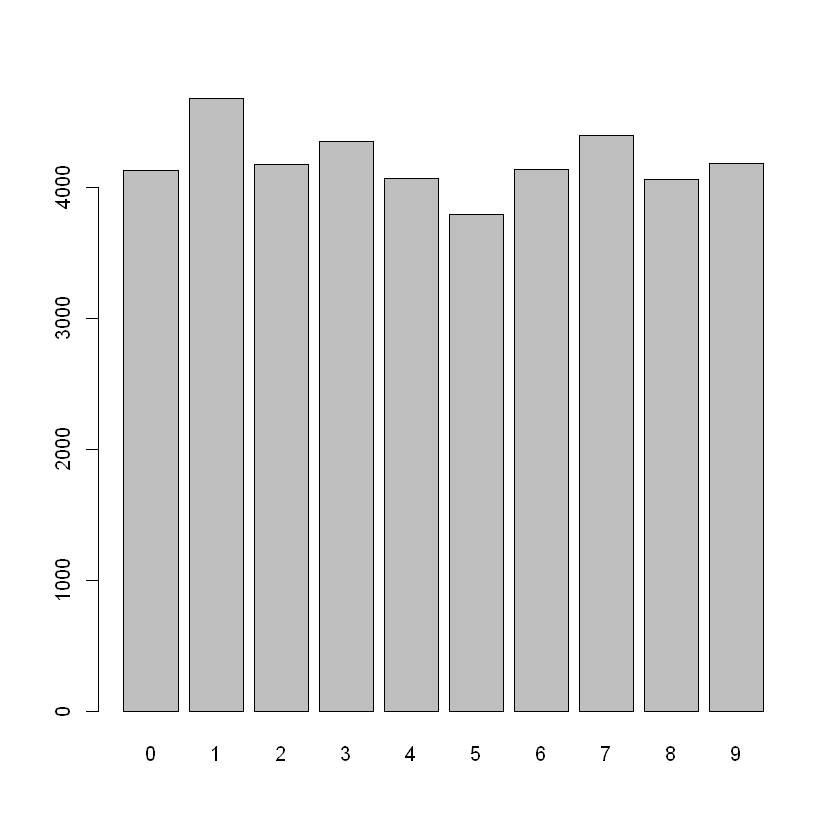

In [3]:
# we can check to see if the data is uniformly distributed over labels
label.freq = table(df_train$label)
barplot(label.freq)
# close enough!

In [4]:
# check for NAs in the data
which(is.na(df_train))
# no return here so we're good

integer(0)

In [5]:
# convert label to a categorical variable instead of just a string
df_train$label <- as.factor(df_train$label)

In [6]:
# separate pixels from the training and testing sets
df_train_pixel <- df_train[,2:ncol(df_train)]
# df_test already was all pixels
df_test_pixel <- df_test[, 1:ncol(df_test)]

In [7]:
## Excluding highly correlated variabls
# obtaining correlation matrix
MatCor <- cor(df_train[sapply(df_train, is.numeric)])
# standard deviation was 0 so we can't use the correlation matrix

Warning message in cor(df_train[sapply(df_train, is.numeric)]):
"the standard deviation is zero"


In [8]:
library(caret)
# we will use nearZeroVar to preprocess the pixels

In [9]:
df_zeroVar <- as.data.frame(colnames(df_train_pixel[nearZeroVar(df_train_pixel)]))
# this selected 532 of 784 pixels that can be used

In [10]:
train_nzv <- nearZeroVar(df_train_pixel)
test_nzv <- nearZeroVar(df_test_pixel)
# we then filter our training and test to use those

In [11]:
# now make new dataframes using these selected pixels
df_train_postnzv <- df_train_pixel[, -train_nzv]
df_test_postnzv <- df_test_pixel[, -train_nzv]

In [12]:
# now preprocess with PCA (principal component analysis)
train_preProcValues <- preProcess(df_train_postnzv, method = c("pca"))
test_preProcValues <- preProcess(df_test_postnzv, method = c("pca"))

x_trainTransformed <- predict(train_preProcValues, df_train_postnzv)
x_testTransformed <- predict(test_preProcValues, df_test_postnzv)

# second value of dims should match
dim(x_trainTransformed)
dim(x_testTransformed)

[1] 42000    91

[1] 28000    91

In [13]:
## now that we've processed the data, it's time to build the models
## Building Models

# 1. Multiclass logistic regression
df_train_final <- x_trainTransformed
df_train_final$label <- df_train$label

dim(df_train_final)

[1] 42000    92

In [14]:
LR_model <- glm(label~., family = binomial(link = "logit"), data = df_train_final)
# LR_model

In [15]:
LR_fitted <- predict(LR_model, newdata = x_testTransformed, type = "response")
head(LR_fitted)

1          2          3          4          5          6 
0.97894451 0.02926218 0.99996820 0.97914565 0.99948198 0.99958843

In [16]:
# LR_confusionMatrix <- confusionMatrix(LR_fitted, df_train_final$label)
# LR_confusionmatrix
# this causes error since types in LR_fitted don't match labels

In [17]:
# table(factor(LR_fitted, levels = min(x_testTransformed):max(x_testTransformed)),
#      factor(x_testTransformed, levels = min(x_testTransformed):max(x_testTransformed)))
# not working and can't figure it out

In [18]:
# LR_accuracy <- as.numeric(LR_confusionMatrix$overall["Accuracy"])
# won't work since last thing didn't

In [19]:
# 2. Random Forests
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine




In [20]:
samplerows <- sample(1:nrow(df_train_pixel), nrow(df_train) * 0.6, replace = FALSE)
df_train_rf <- x_trainTransformed[samplerows,]
df_test_rf <- x_trainTransformed[-samplerows,]

In [21]:
train_labels <- as.factor(df_train[samplerows,]$label)
test_labels <- as.factor(df_train[-samplerows]$label)

In [22]:
RF_Model <-randomForest(df_train_rf, train_labels, ntree = 10)
predict_labels <- predict(RF_Model, df_test_rf)
table(predict_labels)

predict_labels
   0    1    2    3    4    5    6    7    8    9 
1723 1889 1672 1817 1705 1441 1643 1766 1523 1621 

In [ ]:
library(e1071)

In [ ]:
# SVM_Model <- svm(label~., data = df_train_final)
# I think this data is too large for my computer to create
# an svm model in a timely manner

In [ ]:
# summary(SVM_Model)

# prediction <- predict(SVM_Model, df_test_rf)
# table(prediction, df_test_rf$label)